In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'/content/Decisiontree - Sheet1.csv')
df

,outlook,temp,humidity,wind,game
0,sunny,hot,high,weak,0
1,sunny,hot,high,strong,0
2,overcast,hot,high,weak,1
3,rain,mild,high,weak,1
4,rain,cool,normal,weak,1
5,rain,cool,normal,strong,0
6,overcast,cool,normal,strong,1
7,sunny,mild,high,weak,0
8,sunny,cool,normal,weak,1
9,rain,mild,normal,weak,1


In [5]:
input=df.drop(['game'],axis='columns')
target=df['game']
target

,game
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [12]:
le_outlook=LabelEncoder()
le_temp=LabelEncoder()
le_humidity=LabelEncoder()
le_windy=LabelEncoder()

In [15]:
input['outlook']=le_outlook.fit_transform(input['outlook'])
input['humidity']=le_humidity.fit_transform(input['humidity'])
input['wind']=le_windy.fit_transform(input['wind'])
input['temp']=le_temp.fit_transform(input['temp'])

In [34]:
input_n=input.drop(['outlook','temp','humidity','wind'],axis='columns')
input_n

In [35]:
model=tree.DecisionTreeClassifier()
model.fit(input,target)

DecisionTreeClassifier()

In [36]:
prediction=model.predict([[2,0,0,0]])
print("Prediction",prediction)

Prediction [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
accuracy=model.score(input,target)
print("Accuracy",accuracy)


Accuracy 1.0


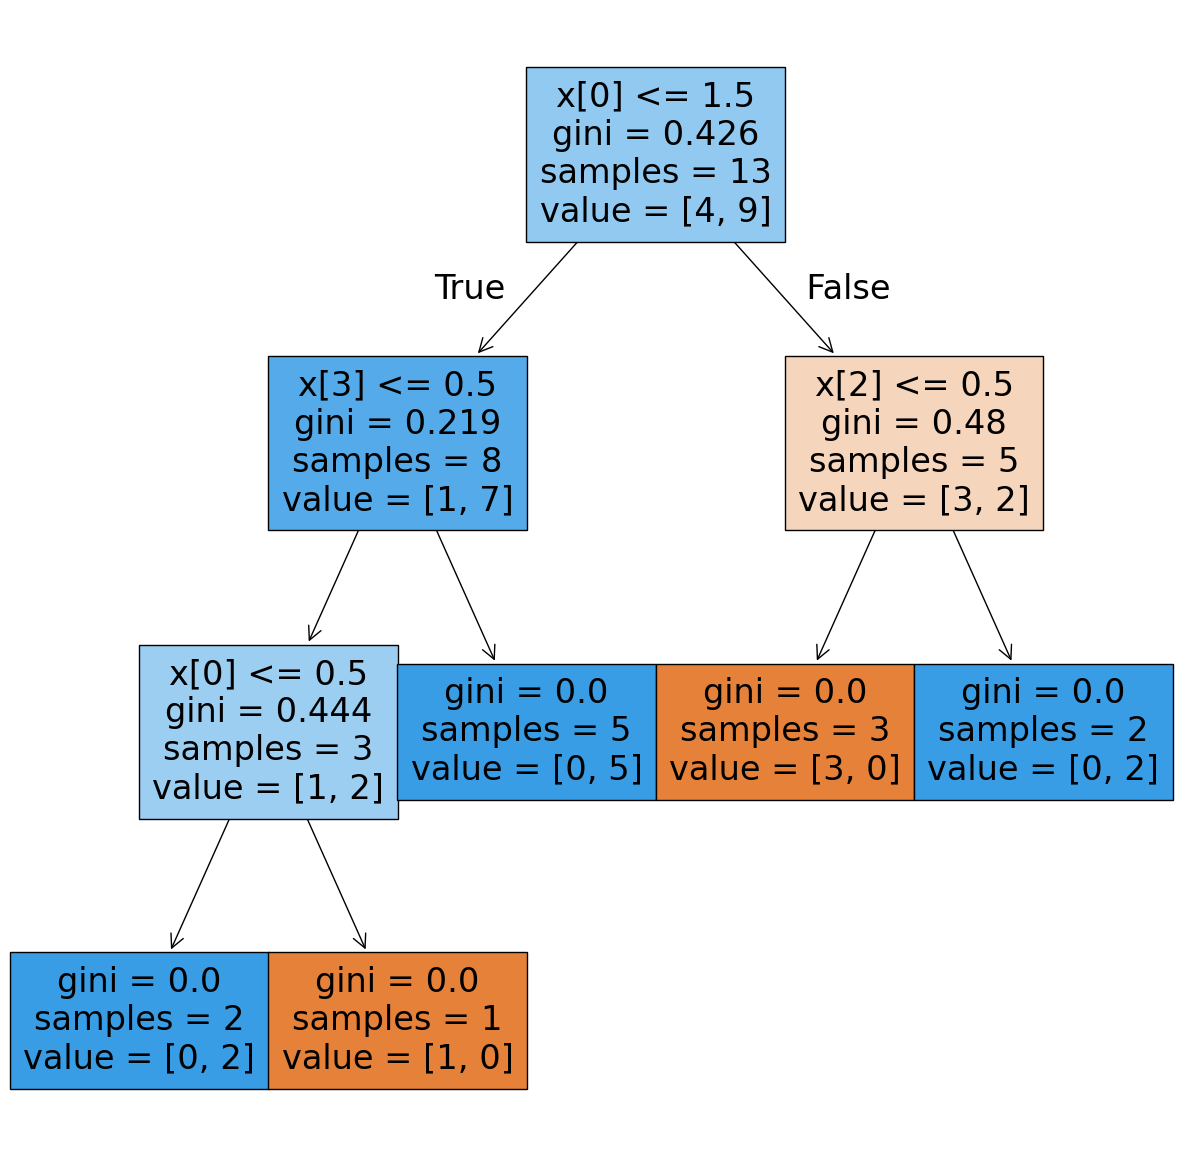

In [38]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)
plt.show()

In [39]:
import numpy as np
def gini_index(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    gini = 1 - np.sum(probabilities ** 2)
    return gini
gini = gini_index(df['game'])
print("Gini Index:", gini)

Gini Index: 0.42603550295857995
